<a href="https://colab.research.google.com/github/phfcs/CienciadeDados/blob/main/IF697_Pre%C3%A7o_Combustivel2004_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('./2004-2021.tsv', sep = '\t')

FileNotFoundError: ignored

In [5]:
data.columns

NameError: ignored

**Renomear colunas**

Como podemos perceber os nomes das colunas não estão muito convencional, isto é, sem espaços ou acentos, assim devemos ajustá-los




In [ ]:
def get_string_adjuster():
    untranslated_string = ' ÁÃÇÍÉÊÚ'
    translated_string = '_AACIEEU'
    
    def adjust_string(to_adjust):
        translation_map = to_adjust.maketrans(untranslated_string, translated_string)
        return to_adjust.translate(translation_map)
    
    return adjust_string

In [ ]:
adjust_string = get_string_adjuster()

column_names_to_adjusted_names = {
    original_name : adjust_string(original_name)
    for original_name
    in data.columns
}

data = data.rename(columns = column_names_to_adjusted_names)
data.columns

Index(['DATA_INICIAL', 'DATA_FINAL', 'REGIAO', 'ESTADO', 'PRODUTO',
       'NUMERO_DE_POSTOS_PESQUISADOS', 'UNIDADE_DE_MEDIDA',
       'PRECO_MEDIO_REVENDA', 'DESVIO_PADRAO_REVENDA', 'PRECO_MINIMO_REVENDA',
       'PRECO_MAXIMO_REVENDA', 'MARGEM_MEDIA_REVENDA',
       'COEF_DE_VARIACAO_REVENDA', 'PRECO_MEDIO_DISTRIBUICAO',
       'DESVIO_PADRAO_DISTRIBUICAO', 'PRECO_MINIMO_DISTRIBUICAO',
       'PRECO_MAXIMO_DISTRIBUICAO', 'COEF_DE_VARIACAO_DISTRIBUICAO'],
      dtype='object')

**Definindo o tipo de colunas**

Objetivos definir o tipo de cada coluna e, caso necessário, ajustá-lo para um condizente com o mostrado


In [ ]:
data.dtypes

DATA_INICIAL                      object
DATA_FINAL                        object
REGIAO                            object
ESTADO                            object
PRODUTO                           object
NUMERO_DE_POSTOS_PESQUISADOS       int64
UNIDADE_DE_MEDIDA                 object
PRECO_MEDIO_REVENDA              float64
DESVIO_PADRAO_REVENDA            float64
PRECO_MINIMO_REVENDA             float64
PRECO_MAXIMO_REVENDA             float64
MARGEM_MEDIA_REVENDA              object
COEF_DE_VARIACAO_REVENDA         float64
PRECO_MEDIO_DISTRIBUICAO          object
DESVIO_PADRAO_DISTRIBUICAO        object
PRECO_MINIMO_DISTRIBUICAO         object
PRECO_MAXIMO_DISTRIBUICAO         object
COEF_DE_VARIACAO_DISTRIBUICAO     object
dtype: object

In [ ]:
data.head()

,DATA_INICIAL,DATA_FINAL,REGIAO,ESTADO,PRODUTO,NUMERO_DE_POSTOS_PESQUISADOS,UNIDADE_DE_MEDIDA,PRECO_MEDIO_REVENDA,DESVIO_PADRAO_REVENDA,PRECO_MINIMO_REVENDA,PRECO_MAXIMO_REVENDA,MARGEM_MEDIA_REVENDA,COEF_DE_VARIACAO_REVENDA,PRECO_MEDIO_DISTRIBUICAO,DESVIO_PADRAO_DISTRIBUICAO,PRECO_MINIMO_DISTRIBUICAO,PRECO_MAXIMO_DISTRIBUICAO,COEF_DE_VARIACAO_DISTRIBUICAO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


Vamos começar convertendo os tipos de datas para objetos datetime de fato utilizando pd.to_datetime



In [ ]:
data['DATA_INICIAL'] = pd.to_datetime(data['DATA_INICIAL'])
data['DATA_FINAL'] = pd.to_datetime(data['DATA_FINAL'])
data[['DATA_INICIAL', 'DATA_FINAL']].dtypes

DATA_INICIAL    datetime64[ns]
DATA_FINAL      datetime64[ns]
dtype: object

Consideramos que região e estado devem ser categórizados

In [ ]:
data['REGIAO'] = data['REGIAO'].astype('category')
data['ESTADO'] = data['ESTADO'].astype('category')
data[['REGIAO', 'ESTADO']].dtypes

REGIAO    category
ESTADO    category
dtype: object

In [ ]:
data['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [ ]:
data['PRODUTO'] = data['PRODUTO'].astype('category')

In [ ]:
data['UNIDADE_DE_MEDIDA'].unique()

array(['R$/l', 'R$/13Kg', 'R$/m3'], dtype=object)

Existe três unidades de medididas distintas para preços pesquisados. Podemos descobrir a proporção de litros para cada, de forma a ter o valor do litro para cada linha. Porém, os valores de desvio padrão e coeficiente de variância já estão calculados nas medidas originais, nos impossibitaremos de obtê-los para as possíveis novas medidas. Sendo assim, vamos considerar três datasets - um para cada unidade de medida.

In [ ]:
print({
    unit : f"{100 * data[data['UNIDADE_DE_MEDIDA'] == unit]['UNIDADE_DE_MEDIDA'].count() / data['UNIDADE_DE_MEDIDA'].count()}%"
    for unit
    in data['UNIDADE_DE_MEDIDA'].unique()
})

{'R$/l': '68.52420482855085%', 'R$/13Kg': '19.500426243347707%', 'R$/m3': '11.975368928101437%'}


Como podemos perceber, a unidade de medida menos recorrente constitui mais de 10% do dataset, de forma que não podemos desprezar nenhuma delas. Desta forma, realizaremos análises para cada das unidades de medidas disponíveis.

Antes de fazermos isso, vamos continuar convertendo valores para seus tipos apropriados.

In [ ]:
data['MARGEM_MEDIA_REVENDA'].describe()

count       120823
unique       12885
top       -99999.0
freq          5517
Name: MARGEM_MEDIA_REVENDA, dtype: object

Há valores em MARGEM_MEDIA_REVENDA que não são NaN, mas são hífens. Vamos converter esses valores para NaNs e atribuir o tipo float64 à coluna.

In [ ]:
data['MARGEM_MEDIA_REVENDA'] = data['MARGEM_MEDIA_REVENDA'].replace({ '-': np.nan })
data['MARGEM_MEDIA_REVENDA'] = data['MARGEM_MEDIA_REVENDA'].astype('float64')
data['MARGEM_MEDIA_REVENDA'].describe()

count    117392.000000
mean      -4697.376395
std       21163.482182
min      -99999.000000
25%           0.272000
50%           0.381000
75%           0.554000
max          36.847000
Name: MARGEM_MEDIA_REVENDA, dtype: float64

Vamos corrigir o mesmo problema para outras colunas que consideramos deverem ser numéricas.

In [ ]:
colnames = [
    'PRECO_MEDIO_DISTRIBUICAO',
    'DESVIO_PADRAO_DISTRIBUICAO',
    'PRECO_MINIMO_DISTRIBUICAO',
    'PRECO_MAXIMO_DISTRIBUICAO',
    'COEF_DE_VARIACAO_DISTRIBUICAO'
]

for colname in colnames:
    data[colname].replace({ '-': np.nan }, inplace = True)

data[colnames].describe()

,PRECO_MEDIO_DISTRIBUICAO,DESVIO_PADRAO_DISTRIBUICAO,PRECO_MINIMO_DISTRIBUICAO,PRECO_MAXIMO_DISTRIBUICAO,COEF_DE_VARIACAO_DISTRIBUICAO
count,117423,117423,117423,117423,117423
unique,17169,6143,23162,24266,399
top,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
freq,5508,5508,5508,5508,5508


Agora podemos substituir os tipos dessas colunas por float64

In [ ]:
for colname in colnames:
    data[colname] = data[colname].astype('float64')

Tipos finais:

In [ ]:
data.dtypes

DATA_INICIAL                     datetime64[ns]
DATA_FINAL                       datetime64[ns]
REGIAO                                 category
ESTADO                                 category
PRODUTO                                category
NUMERO_DE_POSTOS_PESQUISADOS              int64
UNIDADE_DE_MEDIDA                        object
PRECO_MEDIO_REVENDA                     float64
DESVIO_PADRAO_REVENDA                   float64
PRECO_MINIMO_REVENDA                    float64
PRECO_MAXIMO_REVENDA                    float64
MARGEM_MEDIA_REVENDA                    float64
COEF_DE_VARIACAO_REVENDA                float64
PRECO_MEDIO_DISTRIBUICAO                float64
DESVIO_PADRAO_DISTRIBUICAO              float64
PRECO_MINIMO_DISTRIBUICAO               float64
PRECO_MAXIMO_DISTRIBUICAO               float64
COEF_DE_VARIACAO_DISTRIBUICAO           float64
dtype: object

Vamos analisar a quantidade de valores NaN

In [ ]:
data.isna().sum()

DATA_INICIAL                        0
DATA_FINAL                          0
REGIAO                              0
ESTADO                              0
PRODUTO                             0
NUMERO_DE_POSTOS_PESQUISADOS        0
UNIDADE_DE_MEDIDA                   0
PRECO_MEDIO_REVENDA                 0
DESVIO_PADRAO_REVENDA               0
PRECO_MINIMO_REVENDA                0
PRECO_MAXIMO_REVENDA                0
MARGEM_MEDIA_REVENDA             3431
COEF_DE_VARIACAO_REVENDA            0
PRECO_MEDIO_DISTRIBUICAO         3400
DESVIO_PADRAO_DISTRIBUICAO       3400
PRECO_MINIMO_DISTRIBUICAO        3400
PRECO_MAXIMO_DISTRIBUICAO        3400
COEF_DE_VARIACAO_DISTRIBUICAO    3400
dtype: int64

Vamos descobrir quantas linhas têm pelo menos um valor de coluna NaN

In [ ]:
n_cols_na = data[data.isna().any(axis = 1)].count().max()
n_cols_na

3431

In [ ]:
100 * n_cols_na / data.count().max()

2.839691118412885

Somente pouco mais de 2% das linhas do dataset têm valores NaN. Vamos verificar as porcentagens para os subdatasets, de acordo com a unidade de medição.

In [ ]:
data_per_liter = data[data['UNIDADE_DE_MEDIDA'] == 'R$/l']
data_per_13kg = data[data['UNIDADE_DE_MEDIDA'] == 'R$/13Kg']
data_per_cmeter = data[data['UNIDADE_DE_MEDIDA'] == 'R$/m3']

Por litro:

In [ ]:
n_cols_na_per_liter = data_per_liter[data_per_liter.isna().any(axis = 1)].count().max()
n_cols_na_per_liter

532

Porcentagem:

In [ ]:
100 * n_cols_na_per_liter / data_per_liter.count().max()

0.6425664005411086

Por 13Kg:

In [ ]:
n_cols_na_per_13kg = data_per_13kg[data_per_13kg.isna().any(axis = 1)].count().max()
n_cols_na_per_13kg

871

Porcentagem:

In [ ]:
100 * n_cols_na_per_13kg / data_per_13kg.count().max()

3.696787063367429

Por m³:

In [ ]:
n_cols_na_per_cmeter = data_per_cmeter[data_per_cmeter.isna().any(axis = 1)].count().max()
n_cols_na_per_cmeter

2028

Porcentagem:

In [ ]:
100 * n_cols_na_per_cmeter / data_per_cmeter.count().max()

14.016172506738544

Podemos observar a relevância das colunas com valores NaN no caso da unidade de medida de R$/m³. Consideramos como muito pouco relevante a quantidade de colunas com valores NaN para as outras unidades de medida. Vamos procurar agora nos informar sobre os dados indisponíveis para o caso relevante. Para isso, vamos descrever a distribuição da quantidade de campos indisponíveis, nos casos onde há tais campos.

In [ ]:
rows_with_nan = data_per_cmeter.isna().any(axis = 1)
data_per_cmeter[rows_with_nan].isna().sum(axis = 1).describe()

count    2028.000000
mean        5.928501
std         0.593765
min         1.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
dtype: float64

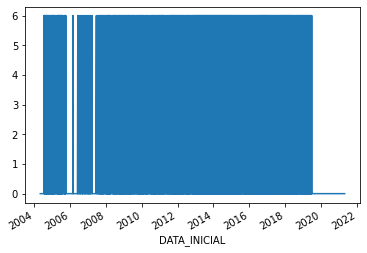

In [ ]:
data_per_cmeter_time_idx = data_per_cmeter.copy()
data_per_cmeter_time_idx.index = data_per_cmeter_time_idx['DATA_INICIAL']
data_per_cmeter_time_idx.isna().sum(axis = 1).plot()

Aparenta faltarem valores para 6 colunas na maioria dos casos, e esses casos parecem estar uniformemente distribuídos. Em um caso como esse, imputar valores pode ser contraprodutivo, por gerar muitas instâncias com valores artificiais. Por isso, vamos remover linhas com valores faltantes.

In [ ]:
rows_no_nan = ~data_per_cmeter.isna().any(axis = 1)
data_per_cmeter_no_nan = data_per_cmeter[rows_no_nan]
data_per_cmeter_no_nan.isna().sum()

DATA_INICIAL                     0
DATA_FINAL                       0
REGIAO                           0
ESTADO                           0
PRODUTO                          0
NUMERO_DE_POSTOS_PESQUISADOS     0
UNIDADE_DE_MEDIDA                0
PRECO_MEDIO_REVENDA              0
DESVIO_PADRAO_REVENDA            0
PRECO_MINIMO_REVENDA             0
PRECO_MAXIMO_REVENDA             0
MARGEM_MEDIA_REVENDA             0
COEF_DE_VARIACAO_REVENDA         0
PRECO_MEDIO_DISTRIBUICAO         0
DESVIO_PADRAO_DISTRIBUICAO       0
PRECO_MINIMO_DISTRIBUICAO        0
PRECO_MAXIMO_DISTRIBUICAO        0
COEF_DE_VARIACAO_DISTRIBUICAO    0
dtype: int64

Comecemos com os dados na unidade de R$/l.

In [ ]:
data_per_liter_no_nan = data_per_liter[~data_per_liter.isna().any(axis = 1)]
data_per_liter_no_nan.isna().sum()

DATA_INICIAL                     0
DATA_FINAL                       0
REGIAO                           0
ESTADO                           0
PRODUTO                          0
NUMERO_DE_POSTOS_PESQUISADOS     0
UNIDADE_DE_MEDIDA                0
PRECO_MEDIO_REVENDA              0
DESVIO_PADRAO_REVENDA            0
PRECO_MINIMO_REVENDA             0
PRECO_MAXIMO_REVENDA             0
MARGEM_MEDIA_REVENDA             0
COEF_DE_VARIACAO_REVENDA         0
PRECO_MEDIO_DISTRIBUICAO         0
DESVIO_PADRAO_DISTRIBUICAO       0
PRECO_MINIMO_DISTRIBUICAO        0
PRECO_MAXIMO_DISTRIBUICAO        0
COEF_DE_VARIACAO_DISTRIBUICAO    0
dtype: int64

In [ ]:
data_per_liter = data_per_liter_no_nan

Seguiremos com a busca e remoção de outliers indevidos

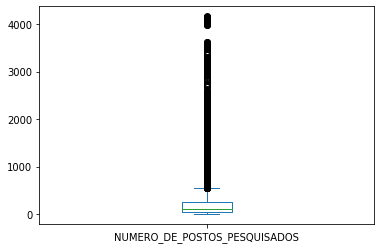

In [ ]:
data_per_liter['NUMERO_DE_POSTOS_PESQUISADOS'].plot.box()

O gráfico aponta um grande número de outliers acima do máximo esperado. Apesar de outliers, são valores possíveis, e pode ser melhor mantê-los no dataset. Pode ser interessante julgar se o tempo de pesquisa é proporcional ao número de postos pesquisados

In [ ]:
n_stations_per_duration = pd.DataFrame()
n_stations_per_duration['DURACAO'] = (data_per_liter['DATA_FINAL'] - data_per_liter['DATA_INICIAL']).apply(lambda x: x.days)
n_stations_per_duration['N_POSTOS'] = data_per_liter['NUMERO_DE_POSTOS_PESQUISADOS']
n_stations_per_duration.head()

,DURACAO,N_POSTOS
0,6,127
1,6,387
2,6,192
3,6,162
4,6,103


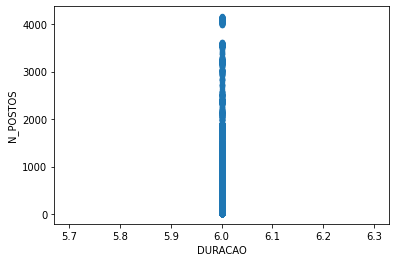

In [ ]:
n_stations_per_duration.plot.scatter(x = 'DURACAO', y = 'N_POSTOS')

Descobrimos que todo intervalo entre datas iniciais e finais dura seis dias. Enquanto isso não nos ajuda a determinar se os outliers de quantidades de postos pesquisados devem ser removidos, é importante para nossa compreensão dos dados. Continuemos

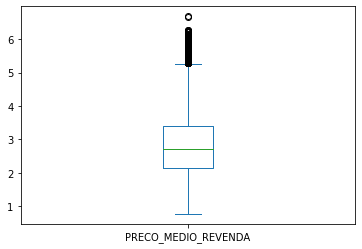

In [ ]:
data_per_liter['PRECO_MEDIO_REVENDA'].plot.box()

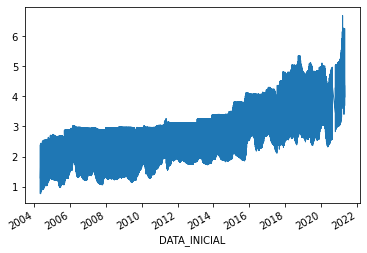

In [ ]:
data_per_liter_time_idx = data_per_liter.copy()
data_per_liter_time_idx.index = data_per_liter_time_idx['DATA_INICIAL']
resell_price = data_per_liter_time_idx['PRECO_MEDIO_REVENDA']
resell_price.plot(linewidth=1)

Devido ao fato de a variação do preço médio de revenda ser alta, foi feita uma regressão linear dos preços da gasolina em cada data (o eixo X são datas no formato "ordinal")

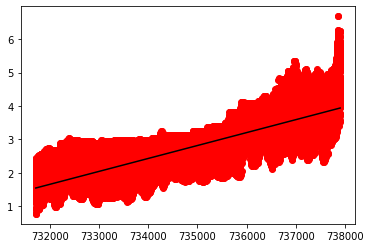

In [ ]:
model = LinearRegression()
x = np.array(data_per_liter_time_idx.index).reshape((-1, 1))
aux = []
for i in range(0, len(x)):
    tempo = str(x[i])
    tempo = tempo[2:12]
    som = dt.datetime.strptime(tempo, '%Y-%m-%d').toordinal()
    aux.append(som)
x = np.array(aux).reshape((-1, 1))
y = np.array(resell_price)
model.fit(x, y)
plt.scatter(x, y,color='r')
plt.plot(x, model.predict(x), color = 'k')

Os outliers de preços médios de revenda podem se justificar nos acréscimos recentes ao preços de combustíveis

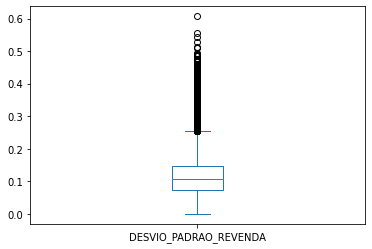

In [ ]:
data_per_liter['DESVIO_PADRAO_REVENDA'].plot.box()

Um alto desvio no valor de revenda provoca desconfiança, por sugerir haver postos onde o valor é consideravelmente menor que média, caso bastante inesperado.

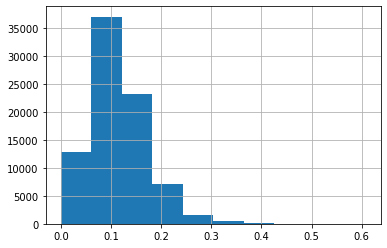

In [ ]:
data_per_liter['DESVIO_PADRAO_REVENDA'].hist()

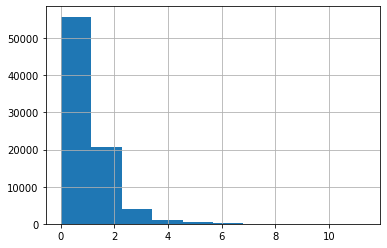

In [ ]:
per_liter_resell_std = data_per_liter['DESVIO_PADRAO_REVENDA']
per_liter_resell_std_mad = (np.abs(per_liter_resell_std - per_liter_resell_std.median())/per_liter_resell_std.mad())
per_liter_resell_std_mad.hist()

Removeremos valores acima do limiar de 3.5

In [ ]:
data_per_liter_no_resell_out = data_per_liter[per_liter_resell_std_mad < 3.5]


Estudemos agora o boxplot da coluna contendo o preço mínimo de revenda

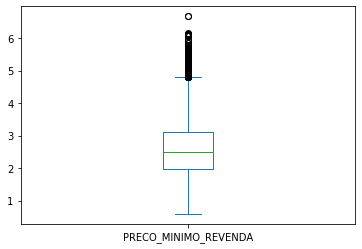

In [ ]:
data_per_liter_no_resell_out['PRECO_MINIMO_REVENDA'].plot.box()

Os outliers podem ser condizentes com determinadas épocas, como no caso do preço médio de revenda

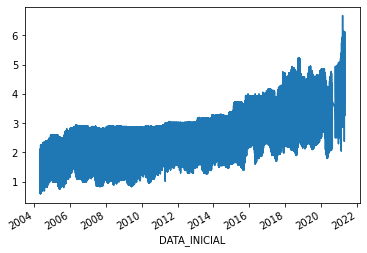

In [ ]:
no_resell_out_time_idx = data_per_liter_no_resell_out.copy()
no_resell_out_time_idx.index = no_resell_out_time_idx['DATA_INICIAL']
no_resell_out_time_idx['PRECO_MINIMO_REVENDA'].plot()

Os valores parecem apropriados de acordo com o tempo. Olhemos para os valores máximos de revenda

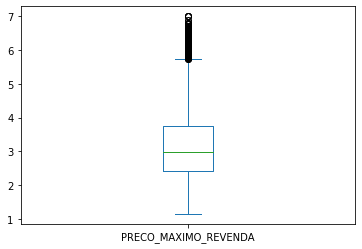

In [ ]:
no_resell_out_time_idx['PRECO_MAXIMO_REVENDA'].plot.box()

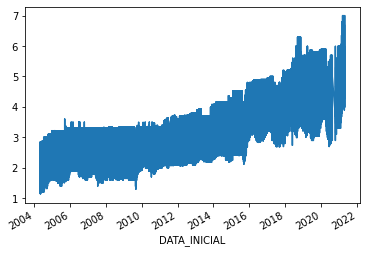

In [ ]:
no_resell_out_time_idx['PRECO_MAXIMO_REVENDA'].plot()

Estudando o período entre 2019 e 2021, onde há outliers no preço de revenda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


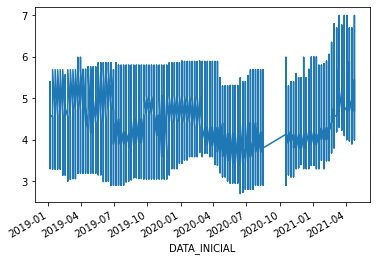

In [ ]:

no_resell_out_time_idx['PRECO_MAXIMO_REVENDA']['2019':'2021'].plot()

Podemos considerar inapropriados os valores máximos de revenda caso estejam demasiado distantes do preços médios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


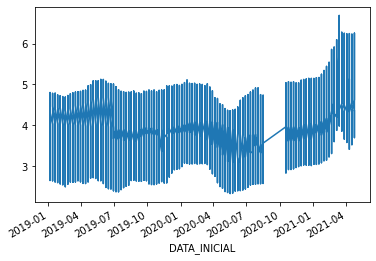

In [ ]:
no_resell_out_time_idx['PRECO_MEDIO_REVENDA']['2019':'2021'].plot()

Os valores estão compatíveis, dando a crer que os outliers devem ser mantidos. A próxima coluna a ser observada será a de margem média de revenda

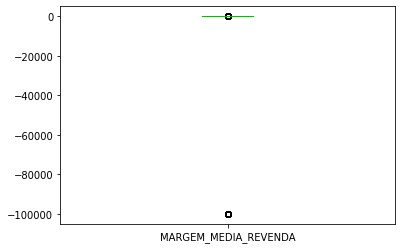

In [ ]:
no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'].plot.box()

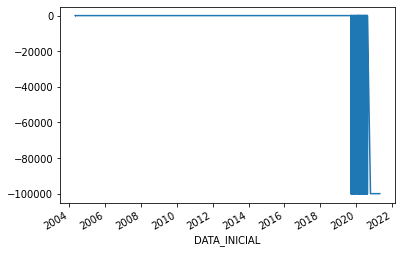

In [ ]:
no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'].plot()

Para verificar se os dados são apropriados, podemos utilizar a subtração entre os valores médios de revenda e de distribuição, que devem, em tese, devem se aproximar da margem média de revenda

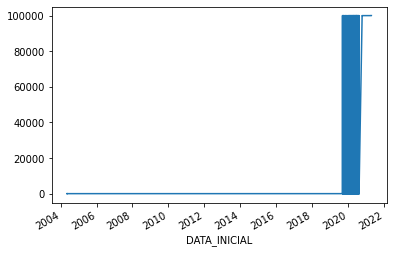

In [ ]:
resell_minus_distribution = no_resell_out_time_idx['PRECO_MEDIO_REVENDA'] - no_resell_out_time_idx['PRECO_MEDIO_DISTRIBUICAO']
resell_minus_distribution.plot()

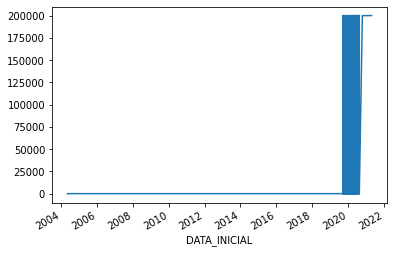

In [ ]:
expected_actual_difference = np.abs(resell_minus_distribution - no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'])
expected_actual_difference.plot()

Como temos diferenças ínfimas, e entendemos os valores de preços médios de revenda e distribuição como corretos, tomamos os valores da mergem média de revenda da mesma forma. Verifiquemos agora o coeficiente de variação do preço de revenda

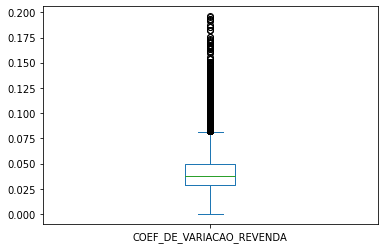

In [ ]:
no_resell_out_time_idx['COEF_DE_VARIACAO_REVENDA'].plot.box()

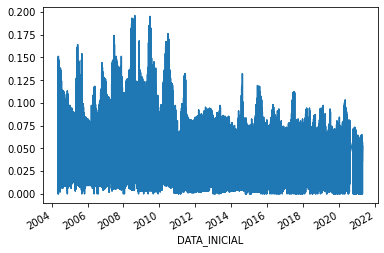

In [ ]:
no_resell_out_time_idx['COEF_DE_VARIACAO_REVENDA'].plot()

Apesar de ter picos, não são extremamente repentinos, tendo fases de crescimento vertiginoso os precedendo, bem como de decrescimento rápido os sucedendo. Já verificamos o preço médio de distribuição nos cálculos da margem de revenda, então vamos agora para o desvio padrão de distribuição.

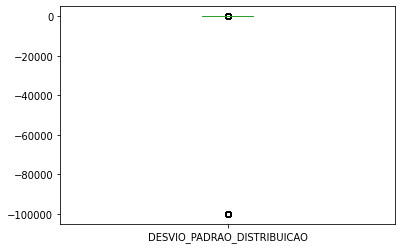

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].plot.box()

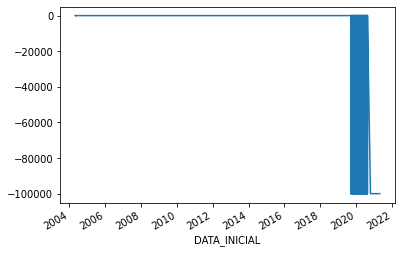

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].plot()

Parece haver outliers necessitando de remoção. verifiquemos se é possível usar MAD

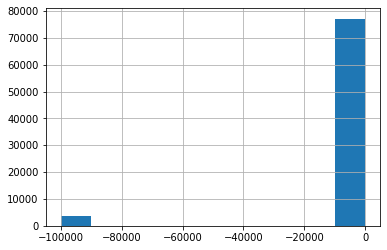

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].hist()

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].skew()

-4.368896587294102

Verifiquemos agora com a distribuição log10

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


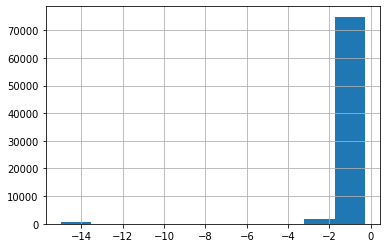

In [ ]:
dist_std = no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO']
dist_std_no_zero = dist_std.replace({ 0: 1e-15 })
np.log10(dist_std_no_zero).hist()

Infelizmente, a distribuição utilizando log10 continua assimétrica. O próximo método será obter a raiz quadrada

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


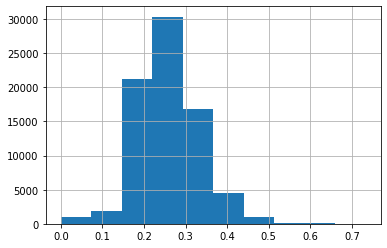

In [ ]:
np.sqrt(dist_std_no_zero).hist()

In [ ]:
no_resell_out_dist_std_mad = np.sqrt(no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'])
no_resell_out_dist_std_mad = np.abs(no_resell_out_dist_std_mad - no_resell_out_dist_std_mad.median()) / no_resell_out_dist_std_mad.mad()
(no_resell_out_dist_std_mad < 3.5).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


75500

In [ ]:
no_dist_std_out_time_idx = no_resell_out_time_idx[no_resell_out_dist_std_mad < 3.5]
len(no_dist_std_out_time_idx)

75500

Analisaremos em seguida a distribuição de valores para preço mínimo de distribuição

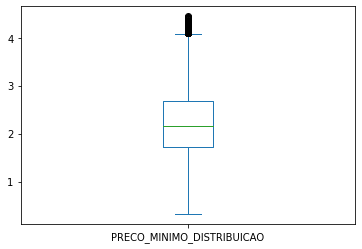

In [ ]:
no_dist_std_out_time_idx['PRECO_MINIMO_DISTRIBUICAO'].plot.box()

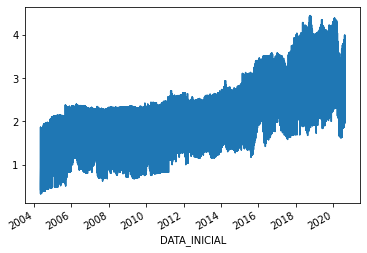

In [ ]:
no_dist_std_out_time_idx['PRECO_MINIMO_DISTRIBUICAO'].plot()

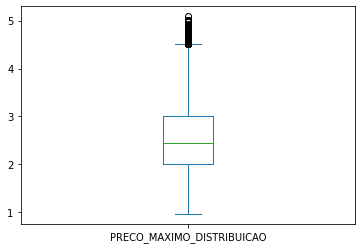

In [ ]:
no_dist_std_out_time_idx['PRECO_MAXIMO_DISTRIBUICAO'].plot.box()

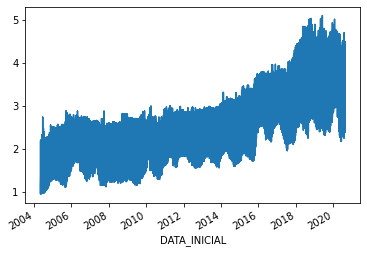

In [ ]:
no_dist_std_out_time_idx['PRECO_MAXIMO_DISTRIBUICAO'].plot()

Assim como para o preço mínimo de distribuição, esses valores condizem com suas épocas. De valor numérico a analisar resta agora somente o coeficiente de variação do valor de distribuição

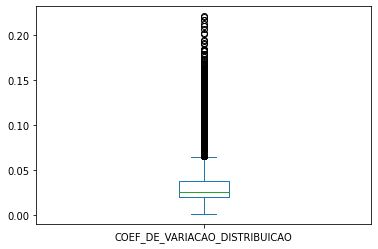

In [ ]:
no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO'].plot.box()

O boxplot sugere uma distribuição enviesada. Verifiquemos como esse valor varia com o tempo

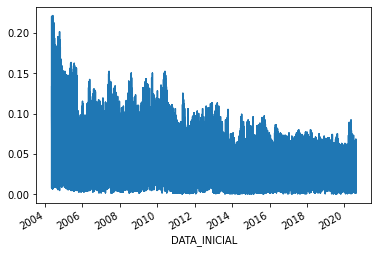

In [ ]:
no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO'].plot()

É interessante removermos outliers, que parecem se concentrar no início do período retratado. Verifiquemos se é possível obter uma distribuição simétrica utilizando o logaritmo ou raiz quadrada

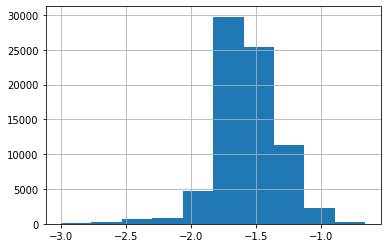

In [ ]:
coef_dist_log = no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO']
coef_dist_log = coef_dist_log.replace({ 0: 1e-15 })
np.log10(coef_dist_log).hist()

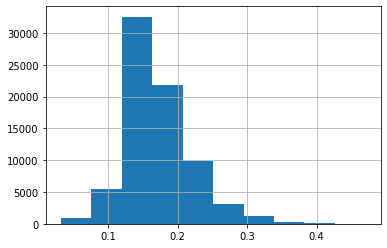

In [ ]:
np.sqrt(coef_dist_log).hist()

Não conseguimos obter uma distribuição simétrica usando o logaritmo nem a raiz e, portanto, manteremos os dados. Prossigamos

In [ ]:
per_liter_clean = no_dist_std_out_time_idx
grouped_by_state = per_liter_clean.groupby('ESTADO')

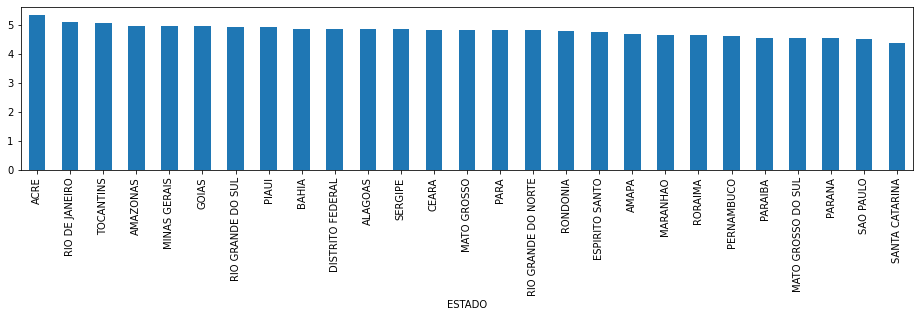

In [ ]:
grouped_by_state['PRECO_MEDIO_REVENDA'].max().sort_values(ascending=False).plot.bar(figsize=(16, 3), rot=90)

As diferenças entre os máximos dos preços médios de revenda por estado não aparentam ser muito grandes visualmente. Vejamos o valor da maior diferença.

In [ ]:

mean_resell_by_state = grouped_by_state['PRECO_MEDIO_REVENDA']
mean_resell_by_state.max().max() - mean_resell_by_state.max().min()

0.9699999999999998

Plotemos os gráficos da evolução do preço médio para os dois estados com maior diferença, Maranhão e Rio grande do Sul.

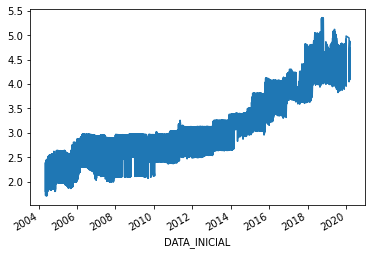

In [ ]:

per_liter_clean[per_liter_clean['ESTADO'] == 'ACRE']['PRECO_MEDIO_REVENDA'].plot()

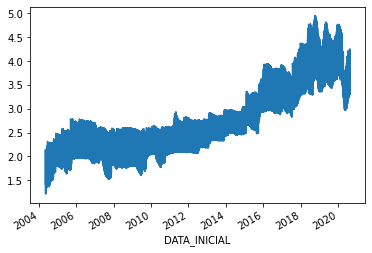

In [ ]:
per_liter_clean[per_liter_clean['ESTADO'] == 'RIO GRANDE DO SUL']['PRECO_MEDIO_REVENDA'].plot()

In [ ]:
mean_resell_acre = per_liter_clean[per_liter_clean['ESTADO'] == 'ACRE']
mean_resell_rio_grande_do_sul = per_liter_clean[per_liter_clean['ESTADO'] == 'RIO GRANDE DO SUL']

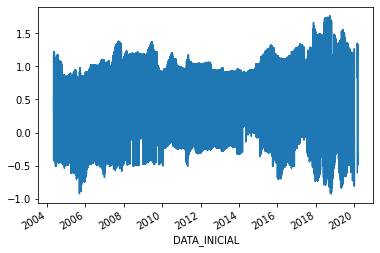

In [ ]:

(mean_resell_acre['PRECO_MEDIO_REVENDA'] - mean_resell_rio_grande_do_sul['PRECO_MEDIO_REVENDA']).plot()

As curvas de evolução do preço médio de revenda tem formatos semelhantes, sendo que Rio Grande do Sul historicamente tem preços médios mais baixos que o Acre. Pelo gráfico das diferenças com relação ao tempo, vê-se que, em certo ponto próximo a 2021, essa diferença esteve próxima de dois reais. Vamos procurar nos informar da data em que houve a maior diferença entre um máximo e um mínimo preço médio de revenda.

In [ ]:

grouped_by_date = per_liter_clean.reset_index(drop=True).groupby('DATA_INICIAL')

In [ ]:
max_diffs = (grouped_by_date['PRECO_MEDIO_REVENDA'].max() - grouped_by_date['PRECO_MEDIO_REVENDA'].min())
max_diffs[max_diffs == max_diffs.max()]

DATA_INICIAL
2018-09-30    2.663
Name: PRECO_MEDIO_REVENDA, dtype: float64

O resultado aponta para a pesquisa da data de 30 de setembro de 2018. É um detalhe importante que um estado pode aparecer mais de uma vez para uma pesquisa, portanto o que mostra o gráfico pode não refletir o resultado obtido acima. Vamos obter os valores médios de preços médios de revenda para essa data, e plotá-los em seguida.

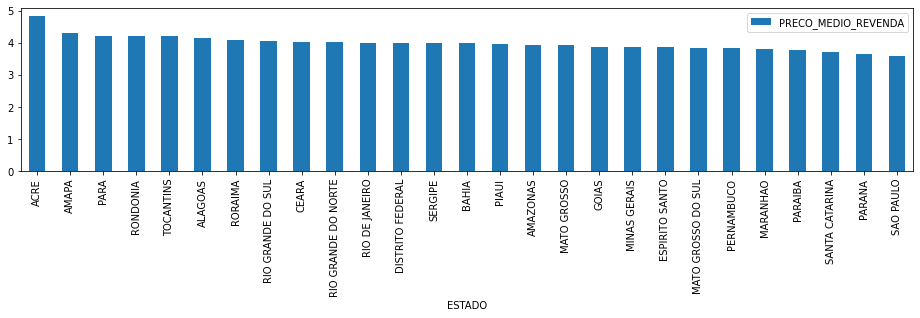

In [ ]:
per_liter_clean.loc['2018-09-30'].groupby('ESTADO').mean().sort_values('PRECO_MEDIO_REVENDA', ascending=False).plot.bar(y='PRECO_MEDIO_REVENDA', figsize=(16, 3))

Iremos utilizar a normalização min-max para os dados

In [ ]:
data_per_liter_norm = no_dist_std_out_time_idx.copy()
cols_to_norm = data_per_liter_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
]

data_per_liter_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
] = (cols_to_norm - cols_to_norm.min()) / (cols_to_norm.max() - cols_to_norm.min())

data_per_liter_norm.describe()

,NUMERO_DE_POSTOS_PESQUISADOS,PRECO_MEDIO_REVENDA,DESVIO_PADRAO_REVENDA,PRECO_MINIMO_REVENDA,PRECO_MAXIMO_REVENDA,MARGEM_MEDIA_REVENDA,COEF_DE_VARIACAO_REVENDA,PRECO_MEDIO_DISTRIBUICAO,DESVIO_PADRAO_DISTRIBUICAO,PRECO_MINIMO_DISTRIBUICAO,PRECO_MAXIMO_DISTRIBUICAO,COEF_DE_VARIACAO_DISTRIBUICAO
count,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000,75500.000000
mean,0.062880,0.426329,0.419904,0.413718,0.368904,0.306022,0.210044,0.443310,0.070775,0.461563,0.387194,0.031364
std,0.104353,0.162973,0.189271,0.156004,0.160167,0.116266,0.094019,0.165299,0.036360,0.165380,0.166524,0.019048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.001000
25%,0.013685,0.292428,0.276923,0.293521,0.241245,0.215943,0.147959,0.316870,0.044000,0.340516,0.252958,0.020000
50%,0.028091,0.408616,0.396154,0.397192,0.350195,0.296670,0.193878,0.418093,0.063000,0.446058,0.360647,0.026000
75%,0.065306,0.538294,0.542308,0.518359,0.478405,0.379415,0.260204,0.555012,0.091000,0.569587,0.496019,0.038000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205000,1.000000,1.000000,0.221000


Agora com os dados na unidade de R$/13kg.

In [ ]:
data_per_13kg_no_nan = data_per_13kg[~data_per_13kg.isna().any(axis = 1)]
data_per_13kg_no_nan.isna().sum()

DATA_INICIAL                     0
DATA_FINAL                       0
REGIAO                           0
ESTADO                           0
PRODUTO                          0
NUMERO_DE_POSTOS_PESQUISADOS     0
UNIDADE_DE_MEDIDA                0
PRECO_MEDIO_REVENDA              0
DESVIO_PADRAO_REVENDA            0
PRECO_MINIMO_REVENDA             0
PRECO_MAXIMO_REVENDA             0
MARGEM_MEDIA_REVENDA             0
COEF_DE_VARIACAO_REVENDA         0
PRECO_MEDIO_DISTRIBUICAO         0
DESVIO_PADRAO_DISTRIBUICAO       0
PRECO_MINIMO_DISTRIBUICAO        0
PRECO_MAXIMO_DISTRIBUICAO        0
COEF_DE_VARIACAO_DISTRIBUICAO    0
dtype: int64

Seguiremos com a busca e remoção de outliers indevidos

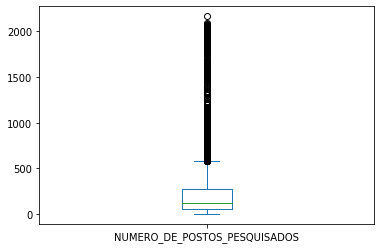

In [ ]:
data_per_13kg['NUMERO_DE_POSTOS_PESQUISADOS'].plot.box()

O gráfico aponta um grande número de outliers acima do máximo esperado. Apesar de outliers, são valores possíveis, e pode ser melhor mantê-los no dataset. Pode ser interessante julgar se o tempo de pesquisa é proporcional ao número de postos pesquisados

In [ ]:
n_stations_per_duration = pd.DataFrame()
n_stations_per_duration['DURACAO'] = (data_per_13kg['DATA_FINAL'] - data_per_13kg['DATA_INICIAL']).apply(lambda x: x.days)
n_stations_per_duration['N_POSTOS'] = data_per_13kg['NUMERO_DE_POSTOS_PESQUISADOS']
n_stations_per_duration.head()

,DURACAO,N_POSTOS
24132,6,44
24133,6,372
24134,6,97
24135,6,109
24136,6,22


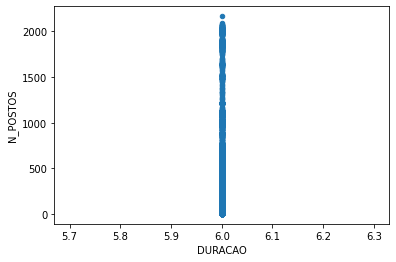

In [ ]:
n_stations_per_duration.plot.scatter(x = 'DURACAO', y = 'N_POSTOS')

Descobrimos que todo intervalo entre datas iniciais e finais dura seis dias. Enquanto isso não nos ajuda a determinar se os outliers de quantidades de postos pesquisados devem ser removidos, é importante para nossa compreensão dos dados. Continuemos

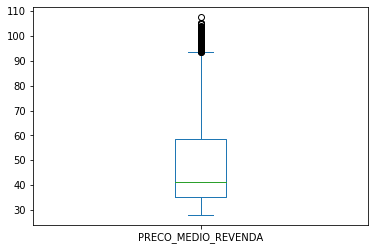

In [ ]:
data_per_13kg['PRECO_MEDIO_REVENDA'].plot.box()

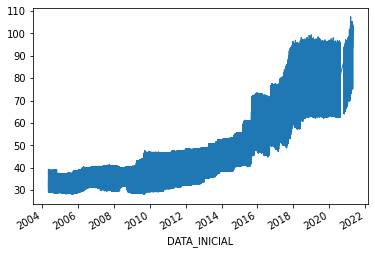

In [ ]:
data_per_13kg_time_idx = data_per_13kg.copy()
data_per_13kg_time_idx.index = data_per_13kg_time_idx['DATA_INICIAL']
resell_price = data_per_13kg_time_idx['PRECO_MEDIO_REVENDA']
resell_price.plot(linewidth=1)

Devido ao fato de a variação do preço médio de revenda ser alta, foi feita uma regressão linear dos preços da gasolina em cada data (o eixo X são datas no formato "ordinal")

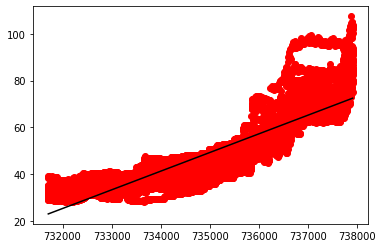

In [ ]:
model = LinearRegression()
x = np.array(data_per_13kg_time_idx.index).reshape((-1, 1))
aux = []
for i in range(0, len(x)):
    tempo = str(x[i])
    tempo = tempo[2:12]
    som = dt.datetime.strptime(tempo, '%Y-%m-%d').toordinal()
    aux.append(som)
x = np.array(aux).reshape((-1, 1))
y = np.array(resell_price)
model.fit(x, y)
plt.scatter(x, y,color='r')
plt.plot(x, model.predict(x), color = 'k')

Os outliers de preços médios de revenda podem se justificar nos acréscimos recentes ao preços de combustíveis

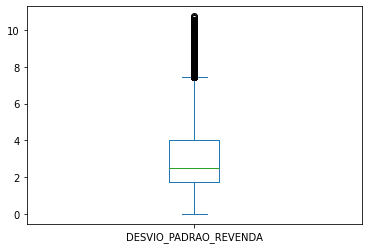

In [ ]:
data_per_13kg['DESVIO_PADRAO_REVENDA'].plot.box()

Um alto desvio no valor de revenda provoca desconfiança, por sugerir haver postos onde o valor é consideravelmente menor que média, caso bastante inesperado.

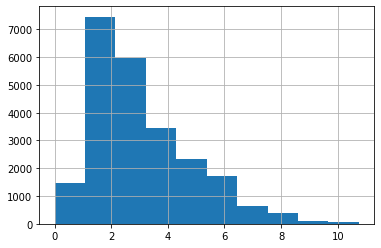

In [ ]:
data_per_13kg['DESVIO_PADRAO_REVENDA'].hist()

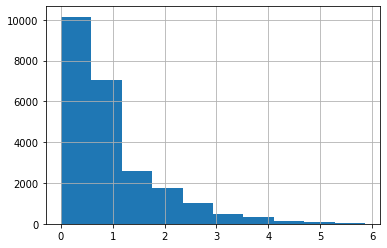

In [ ]:
per_13kg_resell_std = data_per_13kg['DESVIO_PADRAO_REVENDA']
per_13kg_resell_std_mad = (np.abs(per_13kg_resell_std - per_13kg_resell_std.median())/per_13kg_resell_std.mad())
per_13kg_resell_std_mad.hist()

Removeremos valores acima do limiar de 4.5

In [ ]:
data_per_13kg_no_resell_out = data_per_13kg[per_13kg_resell_std_mad < 4.5]

Estudemos agora o boxplot da coluna contendo o preço mínimo de revenda

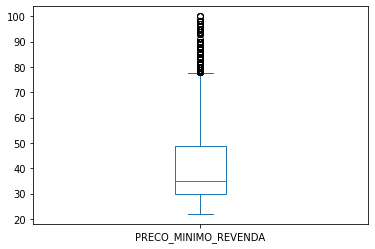

In [ ]:
data_per_13kg_no_resell_out['PRECO_MINIMO_REVENDA'].plot.box()

Os outliers podem ser condizentes com determinadas épocas, como no caso do preço médio de revenda

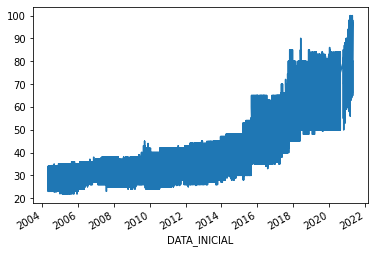

In [ ]:
no_resell_out_time_idx = data_per_13kg_no_resell_out.copy()
no_resell_out_time_idx.index = no_resell_out_time_idx['DATA_INICIAL']
no_resell_out_time_idx['PRECO_MINIMO_REVENDA'].plot()

Os valores parecem apropriados de acordo com o tempo. Olhemos para os valores máximos de revenda

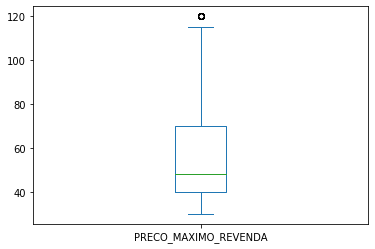

In [ ]:
no_resell_out_time_idx['PRECO_MAXIMO_REVENDA'].plot.box()

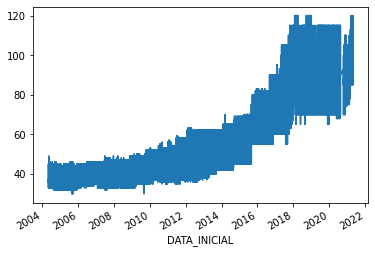

In [ ]:
no_resell_out_time_idx['PRECO_MAXIMO_REVENDA'].plot()

Vamos estudar o período enttre 2019 e 2021, onde há outliers no preço de revenda

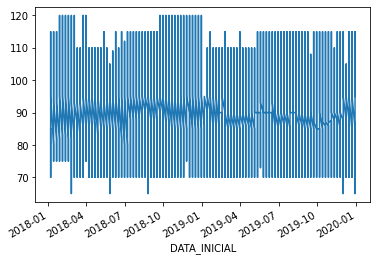

In [ ]:
no_resell_out_time_idx['PRECO_MAXIMO_REVENDA']['2018':'2019'].plot()

Podemos considerar inapropriados os valores máximos de revenda caso estejam demasiado distantes do preços médios

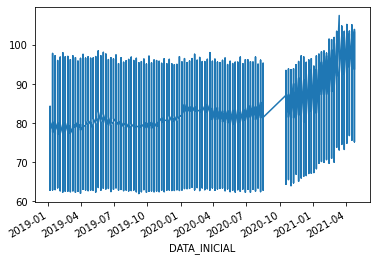

In [ ]:
no_resell_out_time_idx['PRECO_MEDIO_REVENDA']['2019':'2021'].plot()

Os valores estão compatíveis, dando a crer que os outliers devem ser mantidos. A próxima coluna a ser observada será a de margem média de revenda

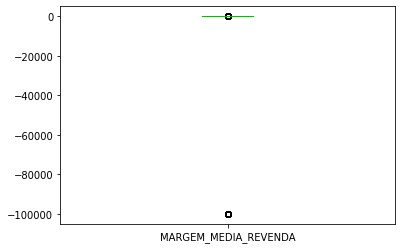

In [ ]:
no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'].plot.box()

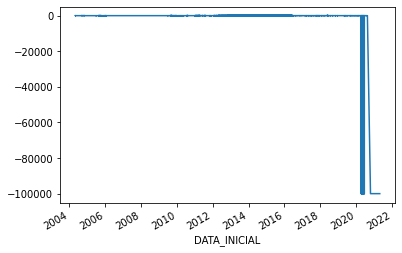

In [ ]:
no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'].plot()

Para verificar se os dados são apropriados, podemos utilizar a subtração entre os valores médios de revenda e de distribuição, que devem, em tese, devem se aproximar da margem média de revenda

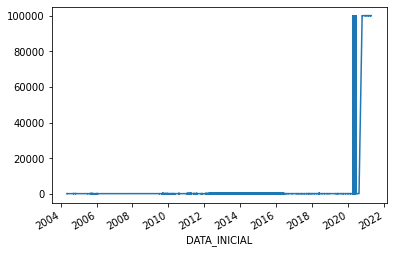

In [ ]:
resell_minus_distribution = no_resell_out_time_idx['PRECO_MEDIO_REVENDA'] - no_resell_out_time_idx['PRECO_MEDIO_DISTRIBUICAO']
resell_minus_distribution.plot()

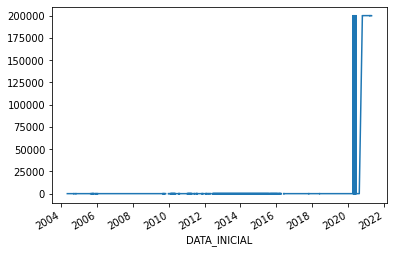

In [ ]:

expected_actual_difference = np.abs(resell_minus_distribution - no_resell_out_time_idx['MARGEM_MEDIA_REVENDA'])
expected_actual_difference.plot()

Como temos diferenças ínfimas, e entendemos os valores de preços médios de revenda e distribuição como corretos, tomamos os valores da mergem média de revenda da mesma forma. Verifiquemos agora o coeficiente de variação do preço de revenda

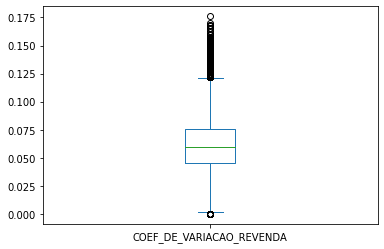

In [ ]:
no_resell_out_time_idx['COEF_DE_VARIACAO_REVENDA'].plot.box()

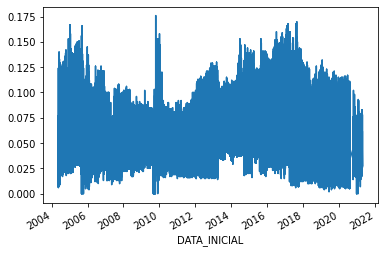

In [ ]:
no_resell_out_time_idx['COEF_DE_VARIACAO_REVENDA'].plot()

Apesar de ter picos, não são extremamente repentinos, tendo fases de crescimento vertiginoso os precedendo, bem como de decrescimento rápido os sucedendo. Já verificamos o preço médio de distribuição nos cálculos da margem de revenda, então vamos agora para o desvio padrão de distribuição.

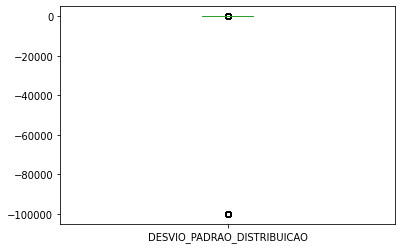

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].plot.box()

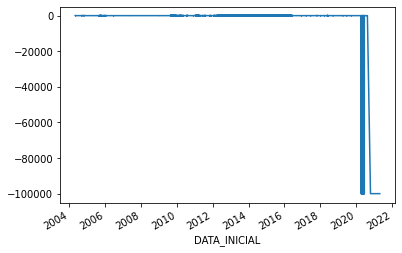

In [ ]:

no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].plot()

Parece haver outliers necessitando de remoção. verifiquemos se é possível usar MAD

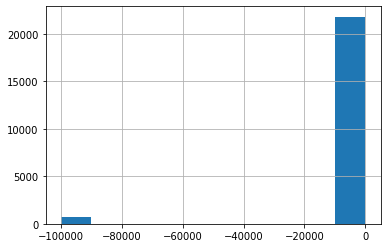

In [ ]:

no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].hist()

In [ ]:
no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'].skew()

-5.150487079006873

Verifiquemos agora com a distribuição log10

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


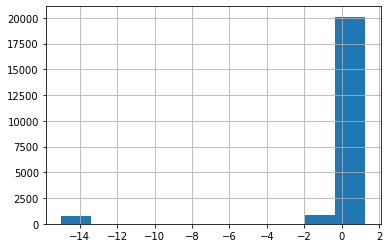

In [ ]:
dist_std = no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO']
dist_std_no_zero = dist_std.replace({ 0: 1e-15 })
np.log10(dist_std_no_zero).hist()

Infelizmente, a distribuição utilizando log10 continua assimétrica. O próximo método será obter a raiz quadrada

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


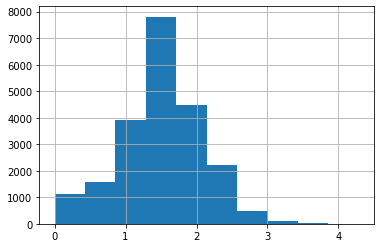

In [ ]:
np.sqrt(dist_std_no_zero).hist()

In [ ]:
no_resell_out_dist_std_mad = np.sqrt(no_resell_out_time_idx['DESVIO_PADRAO_DISTRIBUICAO'])
no_resell_out_dist_std_mad = np.abs(no_resell_out_dist_std_mad - no_resell_out_dist_std_mad.median()) / no_resell_out_dist_std_mad.mad()
(no_resell_out_dist_std_mad < 4.5).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


21743

In [ ]:
no_dist_std_out_time_idx = no_resell_out_time_idx[no_resell_out_dist_std_mad < 3.5]
len(no_dist_std_out_time_idx)

21637


Analisaremos em seguida a distribuição de valores para preço mínimo de distribuição

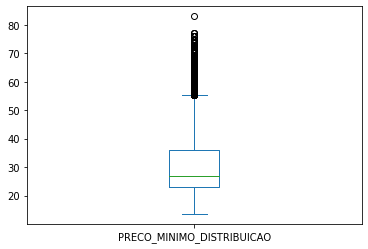

In [ ]:
no_dist_std_out_time_idx['PRECO_MINIMO_DISTRIBUICAO'].plot.box()

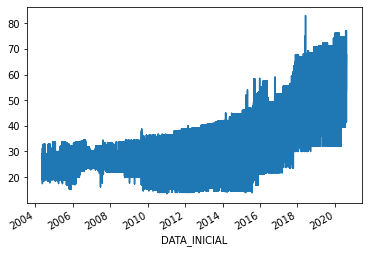

In [ ]:
no_dist_std_out_time_idx['PRECO_MINIMO_DISTRIBUICAO'].plot()


Os valores condizem com as épocas. Vejamos o preço máximo de distribuição

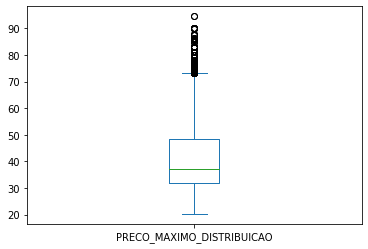

In [ ]:
no_dist_std_out_time_idx['PRECO_MAXIMO_DISTRIBUICAO'].plot.box()

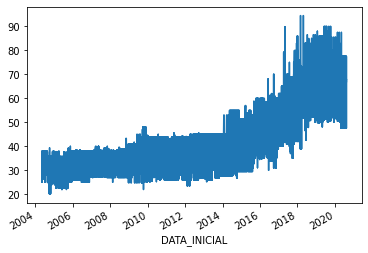

In [ ]:

no_dist_std_out_time_idx['PRECO_MAXIMO_DISTRIBUICAO'].plot()

Assim como para o preço mínimo de distribuição, esses valores condizem com suas épocas. De valor numérico a analisar resta agora somente o coeficiente de variação do valor de distribuição

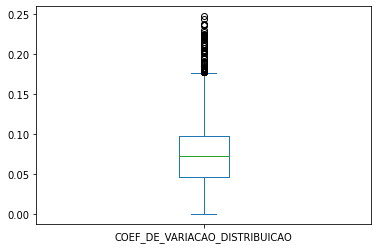

In [ ]:
no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO'].plot.box()

O boxplot sugere uma distribuição enviesada. Verifiquemos como esse valor varia com o tempo

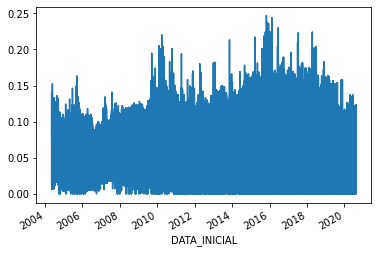

In [ ]:
no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO'].plot()

É interessante removermos outliers, que parecem se concentrar no início do período retratado. Verifiquemos se é possível obter uma distribuição simétrica utilizando o logaritmo ou raiz quadrada

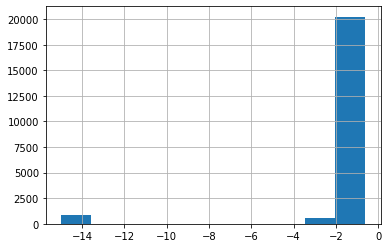

In [ ]:
coef_dist_log = no_dist_std_out_time_idx['COEF_DE_VARIACAO_DISTRIBUICAO']
coef_dist_log = coef_dist_log.replace({ 0: 1e-15 })
np.log10(coef_dist_log).hist()

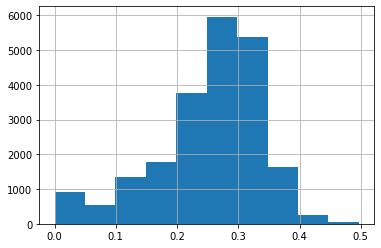

In [ ]:
np.sqrt(coef_dist_log).hist()

Não conseguimos obter uma distribuição simétrica usando o logaritmo nem a raiz e, portanto, manteremos os dados. Prossigamos

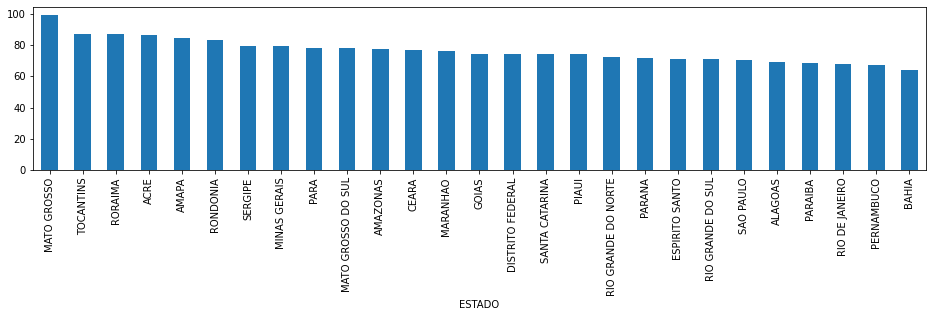

In [ ]:
per_13kg_clean = no_dist_std_out_time_idx
grouped_by_state = per_13kg_clean.groupby('ESTADO')
grouped_by_state['PRECO_MEDIO_REVENDA'].max().sort_values(ascending=False).plot.bar(figsize=(16, 3), rot=90)

A diferença entre os preços médios para R$/13kg por estado é considerável. Vejamos a diferença de maior valor

In [ ]:

mean_resell_by_state = grouped_by_state['PRECO_MEDIO_REVENDA']
mean_resell_by_state.max().max() - mean_resell_by_state.max().min()

34.959

Plotemos os gráficos da evolução do preço médio para os dois estados com maior diferença, Mato Grosso e Bahia.

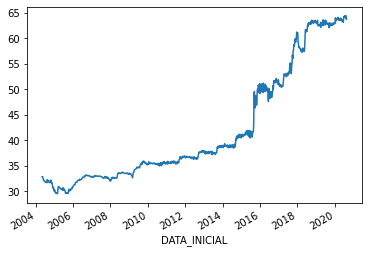

In [ ]:
per_13kg_clean[per_13kg_clean['ESTADO'] == 'BAHIA']['PRECO_MEDIO_REVENDA'].plot()

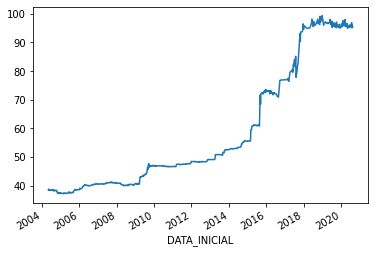

In [ ]:
per_13kg_clean[per_13kg_clean['ESTADO'] == 'MATO GROSSO']['PRECO_MEDIO_REVENDA'].plot()

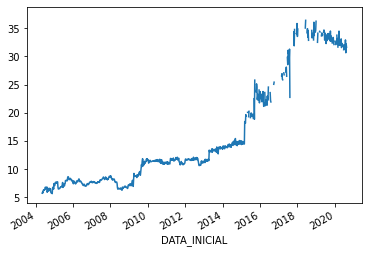

In [ ]:
mean_resell_BA = per_13kg_clean[per_13kg_clean['ESTADO'] == 'BAHIA']
mean_resell_MT = per_13kg_clean[per_13kg_clean['ESTADO'] == 'MATO GROSSO']

(mean_resell_MT['PRECO_MEDIO_REVENDA'] - mean_resell_BA['PRECO_MEDIO_REVENDA']).plot()

As curvas de evolução do preço médio de revenda tem formatos semelhantes, sendo que Bahia historicamente tem preços médios mais baixos que o Mato Grosso. Pelo gráfico das diferenças com relação ao tempo, vê-se que, em certo ponto entre 2018 e 2019, essa diferença esteve acima de R$35,00. Vamos procurar nos informar da data em que houve a maior diferença entre um máximo e um mínimo preço médio de revenda.

In [ ]:
grouped_by_date = per_13kg_clean.reset_index(drop=True).groupby('DATA_INICIAL')

max_diffs = (grouped_by_date['PRECO_MEDIO_REVENDA'].max() - grouped_by_date['PRECO_MEDIO_REVENDA'].min())
max_diffs[max_diffs == max_diffs.max()]

DATA_INICIAL
2017-11-26    37.733
Name: PRECO_MEDIO_REVENDA, dtype: float64

O resultado aponta para a pesquisa da data de 26 de novembro de 2017. É um detalhe importante que um estado pode aparecer mais de uma vez para uma pesquisa, portanto o que mostra o gráfico pode não refletir o resultado obtido acima. Vamos obter os valores médios de preços médios de revenda para essa data, e plotá-los em seguida.

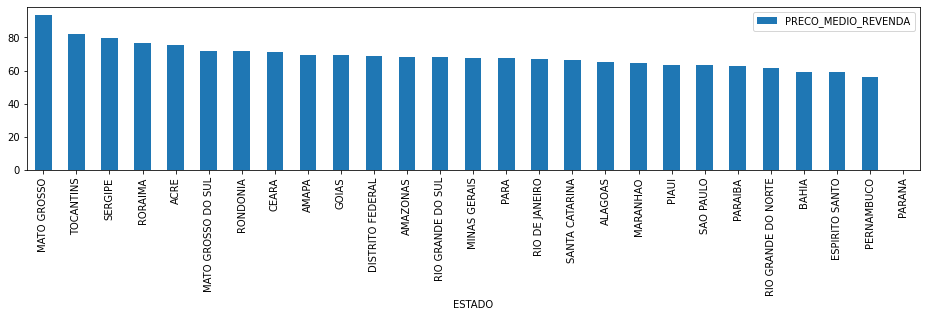

In [ ]:
per_13kg_clean.loc['2017-11-26'].groupby('ESTADO').mean().sort_values('PRECO_MEDIO_REVENDA', ascending=False).plot.bar(y='PRECO_MEDIO_REVENDA', figsize=(16, 3))

Iremos utilizar a normalização min-max para os dados

In [ ]:
data_per_13kg_norm = no_dist_std_out_time_idx.copy()
cols_to_norm = data_per_13kg_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
]

data_per_13kg_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
] = (cols_to_norm - cols_to_norm.min()) / (cols_to_norm.max() - cols_to_norm.min())

data_per_13kg_norm.describe()

,NUMERO_DE_POSTOS_PESQUISADOS,PRECO_MEDIO_REVENDA,DESVIO_PADRAO_REVENDA,PRECO_MINIMO_REVENDA,PRECO_MAXIMO_REVENDA,MARGEM_MEDIA_REVENDA,COEF_DE_VARIACAO_REVENDA,PRECO_MEDIO_DISTRIBUICAO,DESVIO_PADRAO_DISTRIBUICAO,PRECO_MINIMO_DISTRIBUICAO,PRECO_MAXIMO_DISTRIBUICAO,COEF_DE_VARIACAO_DISTRIBUICAO
count,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000,21637.000000
mean,0.120417,0.253948,0.336340,0.256503,0.264084,0.305201,0.368404,0.248601,2.558668,0.246259,0.287539,0.071760
std,0.168025,0.205495,0.191334,0.189383,0.201207,0.153567,0.145738,0.174630,1.665873,0.154538,0.171666,0.038469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030051,0.095050,0.194851,0.117777,0.100000,0.185547,0.270588,0.117261,1.479000,0.137921,0.158136,0.046000
50%,0.055016,0.174833,0.277078,0.191295,0.188889,0.255867,0.352941,0.186189,2.237000,0.193781,0.225485,0.073000
75%,0.128988,0.390545,0.439719,0.338333,0.411111,0.407122,0.452941,0.331027,3.487000,0.323352,0.380388,0.098000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.334000,1.000000,1.000000,0.247000


Seguiremos ao último subdataset, de unidade R$/m³

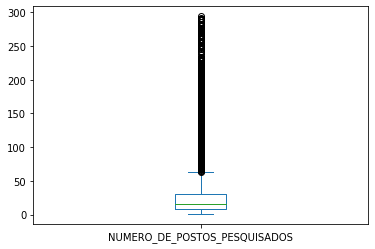

In [ ]:
data_per_cmeter = data_per_cmeter_no_nan
n_postos_pesq_cmeter = data_per_cmeter['NUMERO_DE_POSTOS_PESQUISADOS']
n_postos_pesq_cmeter.plot.box()

Parece se tratar de uma distribuição bastante enviesada, investiguemo-la, e vejamos se é possível simetrizá-la via logaritmo ou raiz quadrada

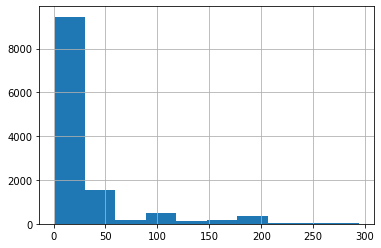

In [ ]:
n_postos_pesq_cmeter.hist()

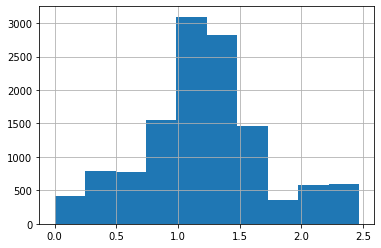

In [ ]:
pesq_cmeter_no_zero = n_postos_pesq_cmeter.replace({ 0: 1e-15 })
np.log10(pesq_cmeter_no_zero).hist()

Com alguma flexibilidade, podemos considerar a distribuição obtida via logaritmo como simétrica. Utilizemos, então, o método MAD para remoção de outliers

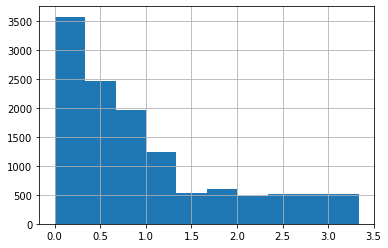

In [ ]:
pesq_cmeter_mad = np.log10(pesq_cmeter_no_zero)
pesq_cmeter_mad = np.abs(pesq_cmeter_mad - pesq_cmeter_mad.median()) / pesq_cmeter_mad.mad()
pesq_cmeter_mad.hist()

Nenhum valor superou o limiar de 3.5, a partir do qual recomenda-se remoção. Sigamos com o preço médio de revenda

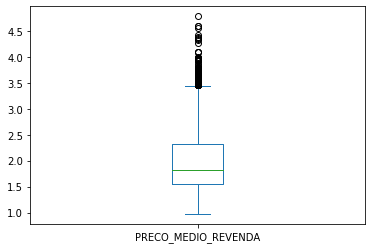

In [ ]:
mean_resell_cmeter = data_per_cmeter['PRECO_MEDIO_REVENDA']
mean_resell_cmeter.plot.box()

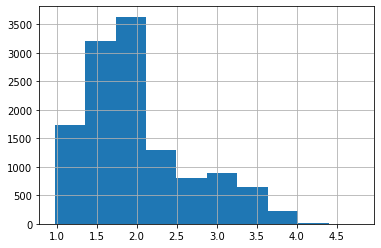

In [ ]:
mean_resell_cmeter.hist()

Os valores de revenda mostrados no plot acima parecem inapropriados, pois sugerem valores de revenda entre um e quatro reais por metro cúbico, o que é improvável se considerarmos que um metro cúbico equivale a mil litros. Vamos plotar um gráfico do valor médio de revenda pelo tempo

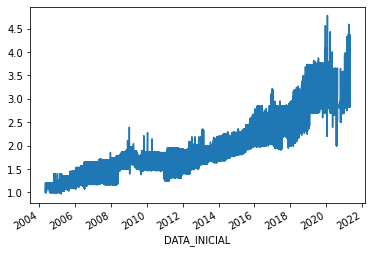

In [ ]:
data_per_cmeter.index = data_per_cmeter['DATA_INICIAL']
mean_resell_cmeter = data_per_cmeter['PRECO_MEDIO_REVENDA']
mean_resell_cmeter.plot()

Vamos continuar nossa análise sob a hipótese dos valores mostrados se tratarem, na realidade, de milhares de reais por metro cúbico. Quanto à distribuição enviesada, a justificativa parece se mostrar nos aumentos recentes aos preços de combustíveis. Sigamos para o desvio padrão de revenda

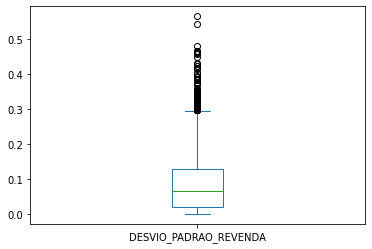

In [ ]:
resell_std_cmeter = data_per_cmeter['DESVIO_PADRAO_REVENDA']
resell_std_cmeter.plot.box()

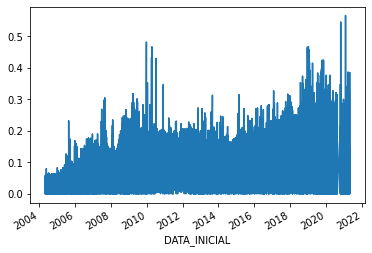

In [ ]:
resell_std_cmeter.plot()

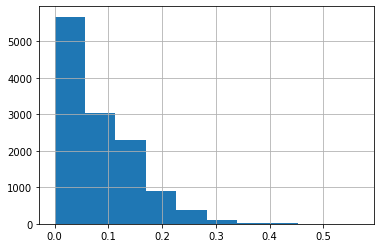

In [ ]:
resell_std_cmeter.hist()

Tentemos utilizar o logaritmo para obter uma distribuição simétrica

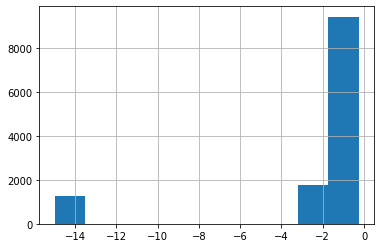

In [ ]:
resell_std_cmeter_no_zero = resell_std_cmeter.replace({ 0: 1e-15 })
resell_std_cmeter_log = np.log10(resell_std_cmeter_no_zero)
resell_std_cmeter_log.hist()

Não tivemos sucesso. Tentemos a partir da raiz quadrada

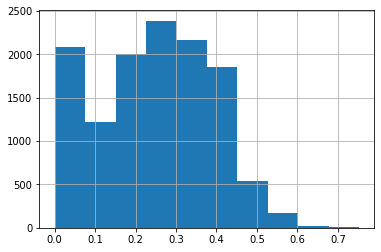

In [ ]:
resell_std_cmeter_sqrt = np.sqrt(resell_std_cmeter)
resell_std_cmeter_sqrt.hist()

Obtivemos uma distribuição mais próxima da simetria. Utilizemos o MAD novamente

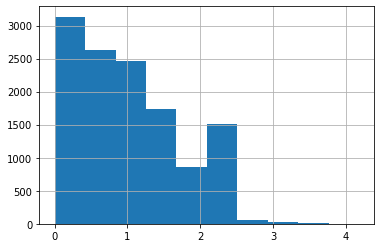

In [ ]:
resell_std_cmeter_mad = np.abs(resell_std_cmeter_sqrt - resell_std_cmeter_sqrt.median()) / resell_std_cmeter_sqrt.mad()
resell_std_cmeter_mad.hist()

Alguns poucos valores superaram o limiar de 3.5. Vamos removê-los

In [ ]:
print(f'Quantidade de linhas anterior à remoção: {len(data_per_cmeter)}')
no_resell_std_out_cmeter = data_per_cmeter[resell_std_cmeter_mad < 3.5]
print(f'Quantidade de linhas após remoção: {len(no_resell_std_out_cmeter)}')

Quantidade de linhas anterior à remoção: 12441
Quantidade de linhas após remoção: 12432


Prossigamos para o preço mínimo de revenda

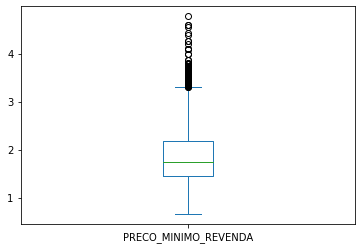

In [ ]:
min_resell_cmeter = no_resell_std_out_cmeter['PRECO_MINIMO_REVENDA']
min_resell_cmeter.plot.box()

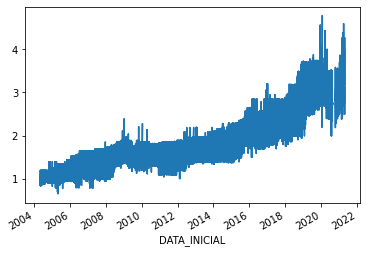

In [ ]:
min_resell_cmeter.plot()

Mais uma vez, os outliers parecem se justificar nos aumentos recentes nos preços dos combustíveis. Prossigamos para o preço máximo de revenda, onde esperamos o mesmo comportamento da evolução dos valores.

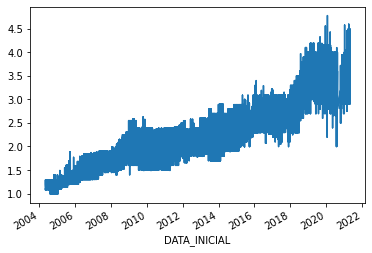

In [ ]:
max_resell_cmeter = no_resell_std_out_cmeter['PRECO_MAXIMO_REVENDA']
max_resell_cmeter.plot()

De fato, os valores possuem aclive nos meses recentes. Prossigamos para a margem média de revenda.

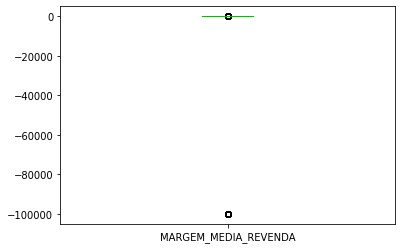

In [ ]:
margin_cmeter = no_resell_std_out_cmeter['MARGEM_MEDIA_REVENDA']
margin_cmeter.plot.box()

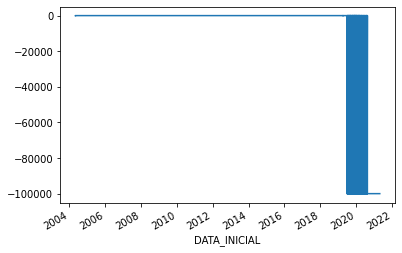

In [ ]:
margin_cmeter.plot()

Verifiquemos se os valores observados condizem com as diferenças entre preço médio de revenda e preço médio de distribuição.

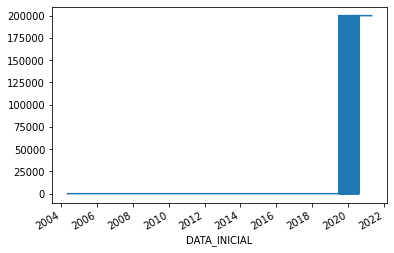

In [ ]:
expected_actual_diff = np.abs(margin_cmeter - (no_resell_std_out_cmeter['PRECO_MEDIO_REVENDA'] - no_resell_std_out_cmeter['PRECO_MEDIO_DISTRIBUICAO']))
expected_actual_diff.plot()

Observando-se as diferenças mínimas entre valores registrados e os deduzidos, podemos dizer que os valores de margem média de revenda estão de acordo com o esperado. Prossigamos para o coeficiente de variação de revenda.

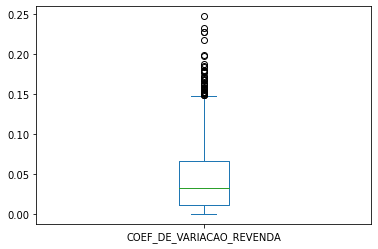

In [ ]:
coef_resell_cmeter = no_resell_std_out_cmeter['COEF_DE_VARIACAO_REVENDA']
coef_resell_cmeter.plot.box()

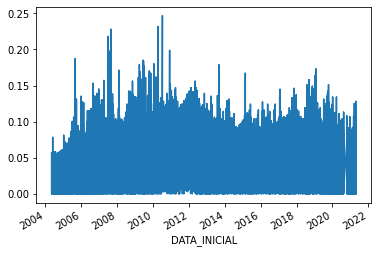

In [ ]:
coef_resell_cmeter.plot()

Os outliers não parecem ter alguma relação em particular com épocas. Verifiquemos o formato da distribuição, que, pelo boxplot, parece ser enviesado.

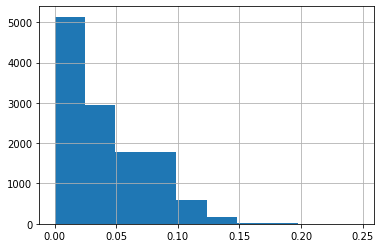

In [ ]:
coef_resell_cmeter.hist()

Esse histograma se assemelha em formato ao de desvio padrão de preço de revenda. Tentemos, como para aquele, usar a raiz quadrada para obter uma distribuição simétrica.

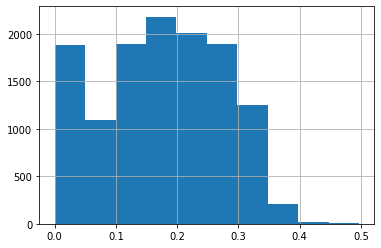

In [ ]:
coef_resell_cmeter_sqrt = np.sqrt(coef_resell_cmeter)
coef_resell_cmeter_sqrt.hist()

Utilizemos MAD para a remoção de outliers

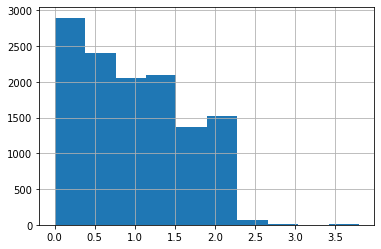

In [ ]:
coef_resell_cmeter_mad = np.abs(coef_resell_cmeter_sqrt - coef_resell_cmeter_sqrt.median()) / coef_resell_cmeter_sqrt.mad()
coef_resell_cmeter_mad.hist()

Nenhum valor mostrou-se acima do limiar e, portanto, vamos mantê-los. Sigamos para o preço médio de distribuição.

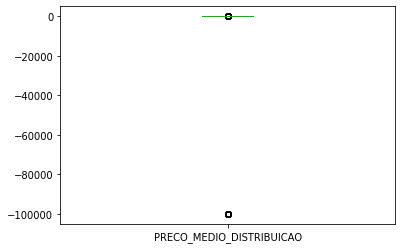

In [ ]:
mean_dist_cmeter = no_resell_std_out_cmeter['PRECO_MEDIO_DISTRIBUICAO']
mean_dist_cmeter.plot.box()

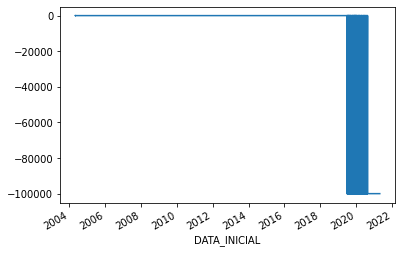

In [ ]:
mean_dist_cmeter.plot()

Os outliers parecem ligados às épocas recentes. Sigamos para o desvio padrão de distribuição.

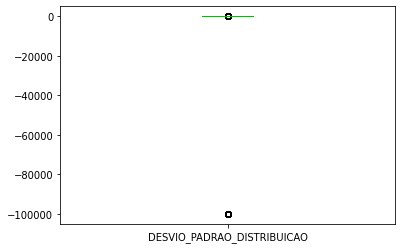

In [ ]:
dist_std_cmeter = no_resell_std_out_cmeter['DESVIO_PADRAO_DISTRIBUICAO']
dist_std_cmeter.plot.box()

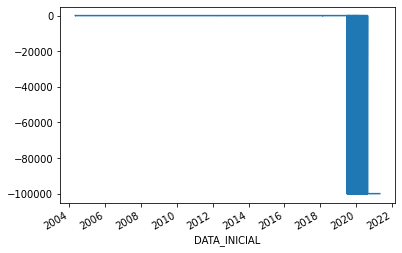

In [ ]:
dist_std_cmeter.plot()

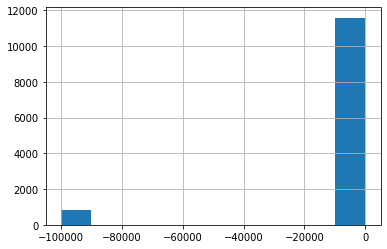

In [ ]:
dist_std_cmeter.hist()

Tentemos obter uma distribuição simétrica pelo uso de logaritmo ou raiz quadrada

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


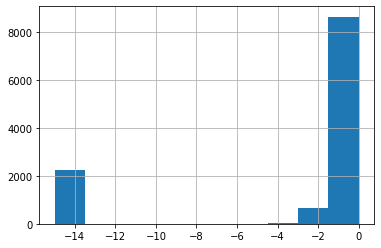

In [ ]:

dist_std_cmeter_no_zero = dist_std_cmeter.replace({ 0: 1e-15 })
np.log10(dist_std_cmeter_no_zero).hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


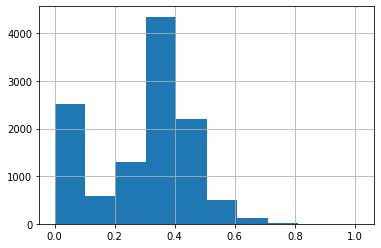

In [ ]:
np.sqrt(dist_std_cmeter).hist()

Não conseguimos obter distribuições simétricas, de forma que manteremos os outliers. Sigamos com preço mínimo de distribuição.

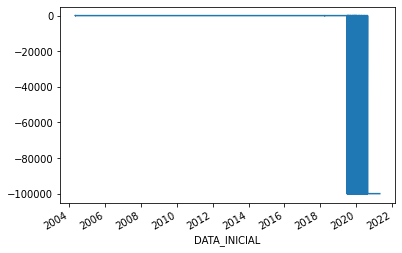

In [ ]:
min_dist_cmeter = no_resell_std_out_cmeter['PRECO_MINIMO_DISTRIBUICAO']
min_dist_cmeter.plot()

Novamente, os outliers localizariam-se no aclive de épocas recentes. Esperamos o mesmo comportamento para a distribuição dos valores de preços máximos de distribuição.

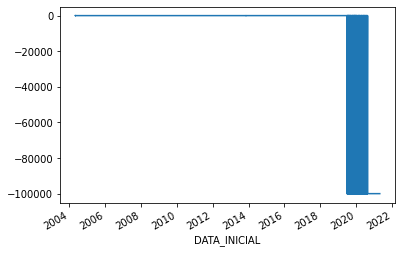

In [ ]:
max_dist_cmeter = no_resell_std_out_cmeter['PRECO_MAXIMO_DISTRIBUICAO']
max_dist_cmeter.plot()

A observação está de acordo com o esperado. Terminemos a remoção de outliers, agora, com o coeficiente de variação de distribuição.

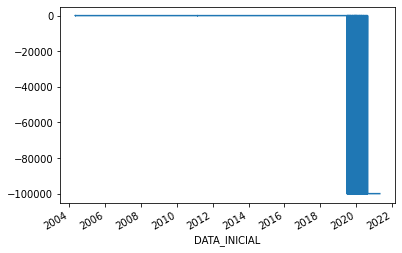

In [ ]:
coef_dist_cmeter = no_resell_std_out_cmeter['COEF_DE_VARIACAO_DISTRIBUICAO']
coef_dist_cmeter.plot()

Os valores não parecem ter relação específica com épocas. Verifiquemos sua distribuição, e se podemos remover outliers.

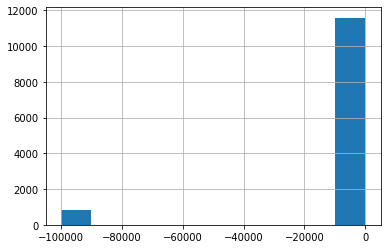

In [ ]:
coef_dist_cmeter.hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


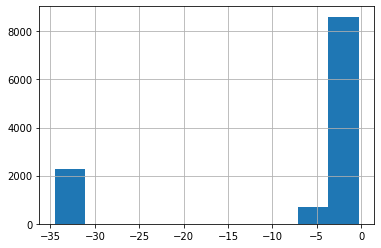

In [ ]:
coef_dist_cmeter_no_zero = coef_dist_cmeter.replace({ 0: 1e-15 })
coef_dist_cmeter_log = np.log(coef_dist_cmeter_no_zero)
coef_dist_cmeter_log.hist()

Não conseguimos uma distribuição simétrica. Tentemos utilizar a raiz quadrada.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


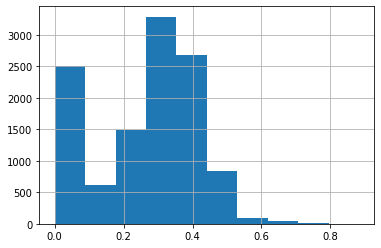

In [ ]:
coef_dist_cmeter_sqrt = np.sqrt(coef_dist_cmeter)
coef_dist_cmeter_sqrt.hist()

Não foi possível obter uma distribuição simétrica, de forma que manteremos os outliers.

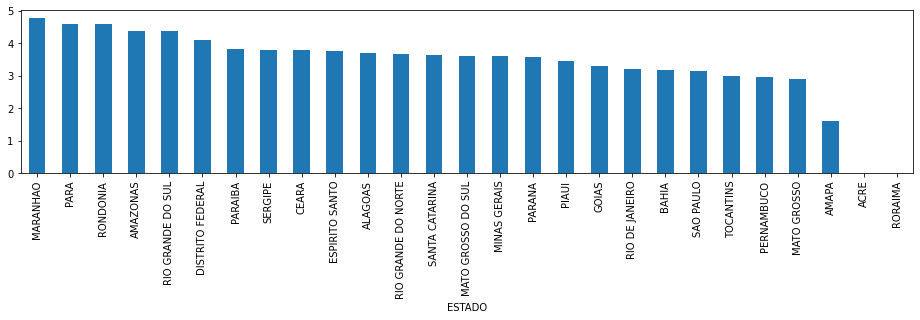

In [ ]:
per_cmeter_clean = no_resell_std_out_cmeter
grouped_by_state = per_cmeter_clean.groupby('ESTADO')
grouped_by_state['PRECO_MEDIO_REVENDA'].max().sort_values(ascending=False).plot.bar(figsize=(16, 3), rot=90)

A diferença entre os preços médios para R³ãéá/13kg. Vejamos a diferença de maior valor

In [ ]:
mean_resell_by_state = grouped_by_state['PRECO_MEDIO_REVENDA']
mean_resell_by_state.max().max() - mean_resell_by_state.max().min()

3.181

Vemos novamente que os estados Paraíba e Amapá possuem a maior diferença, vejamos o valor

In [ ]:
mean_resell_by_state = grouped_by_state['PRECO_MEDIO_REVENDA']
mean_resell_by_state.max().max() - mean_resell_by_state.max().min()

3.181

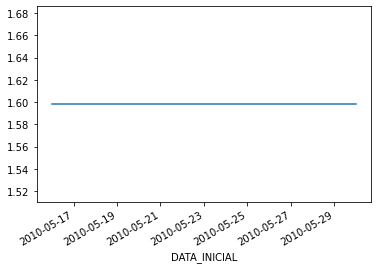

In [ ]:
per_cmeter_clean[per_cmeter_clean['ESTADO'] == 'AMAPA']['PRECO_MEDIO_REVENDA'].plot()

Vemos que não há dados o suficiente para análise com o estado do Amapá, por isso vamos considerar o estado de Pernambuco

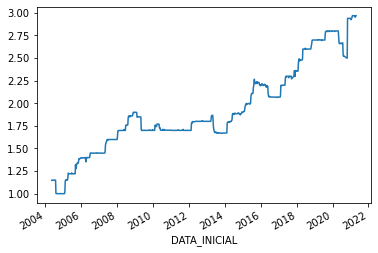

In [ ]:
per_cmeter_clean[per_cmeter_clean['ESTADO'] == 'PERNAMBUCO']['PRECO_MEDIO_REVENDA'].plot()

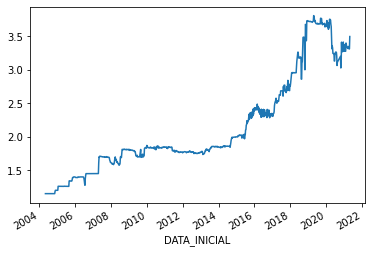

In [ ]:
per_cmeter_clean[per_cmeter_clean['ESTADO'] == 'PARAIBA']['PRECO_MEDIO_REVENDA'].plot()

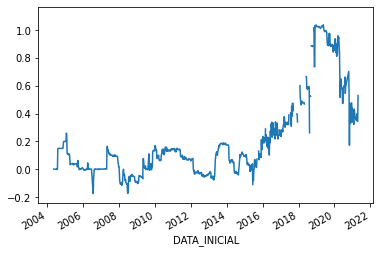

In [ ]:
mean_resell_PE = per_cmeter_clean[per_cmeter_clean['ESTADO'] == 'PERNAMBUCO']
mean_resell_PB = per_cmeter_clean[per_cmeter_clean['ESTADO'] == 'PARAIBA']

(mean_resell_PB['PRECO_MEDIO_REVENDA'] - mean_resell_PE['PRECO_MEDIO_REVENDA']).plot()

As curvas de evolução do preço médio de revenda tem formatos semelhantes, sendo que Pernambuco historicamente tem preços médios mais baixos que a Paraíba. Pelo gráfico das diferenças com relação ao tempo, vê-se que, em certo ponto entre 2019 e 2020, essa diferença esteve acima de R$10,00. Vamos procurar nos informar da data em que houve a maior diferença entre um máximo e um mínimo preço médio de revenda.

In [ ]:
grouped_by_date = per_cmeter_clean.reset_index(drop=True).groupby('DATA_INICIAL')

max_diffs = (grouped_by_date['PRECO_MEDIO_REVENDA'].max() - grouped_by_date['PRECO_MEDIO_REVENDA'].min())
max_diffs[max_diffs == max_diffs.max()]

DATA_INICIAL
2020-01-26    1.98
Name: PRECO_MEDIO_REVENDA, dtype: float64

O resultado aponta para a pesquisa da data de 26 de janeiro de 2020. É um detalhe importante que um estado pode aparecer mais de uma vez para uma pesquisa, portanto o que mostra o gráfico pode não refletir o resultado obtido acima. Vamos obter os valores médios de preços médios de revenda para essa data, e plotá-los em seguida.

In [ ]:
per_cmeter_clean.loc['2020-02-26'].groupby('ESTADO').mean().sort_values('PRECO_MEDIO_REVENDA', ascending=False).plot.bar(y='PRECO_MEDIO_REVENDA', figsize=(16, 3))

Façamos agora a normailzação min-max para os dados.

In [1]:
data_per_cmeter_norm = no_resell_std_out_cmeter.copy()
cols_to_norm = data_per_cmeter_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
]

data_per_cmeter_norm[
    [
     'NUMERO_DE_POSTOS_PESQUISADOS',
     'PRECO_MEDIO_REVENDA',
     'PRECO_MEDIO_DISTRIBUICAO',
     'DESVIO_PADRAO_REVENDA',
     'PRECO_MINIMO_REVENDA',
     'PRECO_MAXIMO_REVENDA',
     'PRECO_MINIMO_DISTRIBUICAO',
     'PRECO_MAXIMO_DISTRIBUICAO',
     'COEF_DE_VARIACAO_REVENDA',
     'MARGEM_MEDIA_REVENDA'
    ]
] = (cols_to_norm - cols_to_norm.min()) / (cols_to_norm.max() - cols_to_norm.min())

data_per_cmeter_norm.describe()

NameError: ignored